In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import category_encoders as ce 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
#importing necessary libraries

In [2]:
df=pd.read_csv("heart.csv")
df.head()
#loading data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

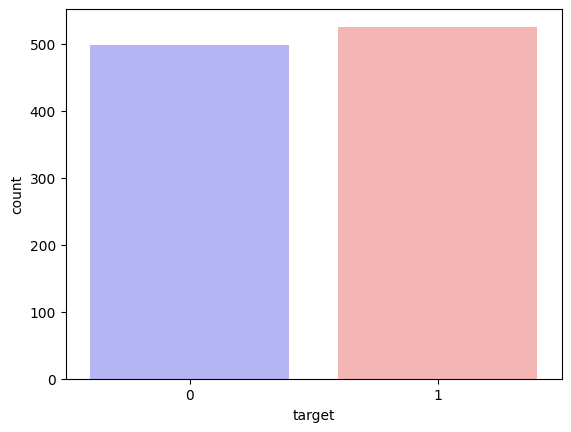

In [6]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()


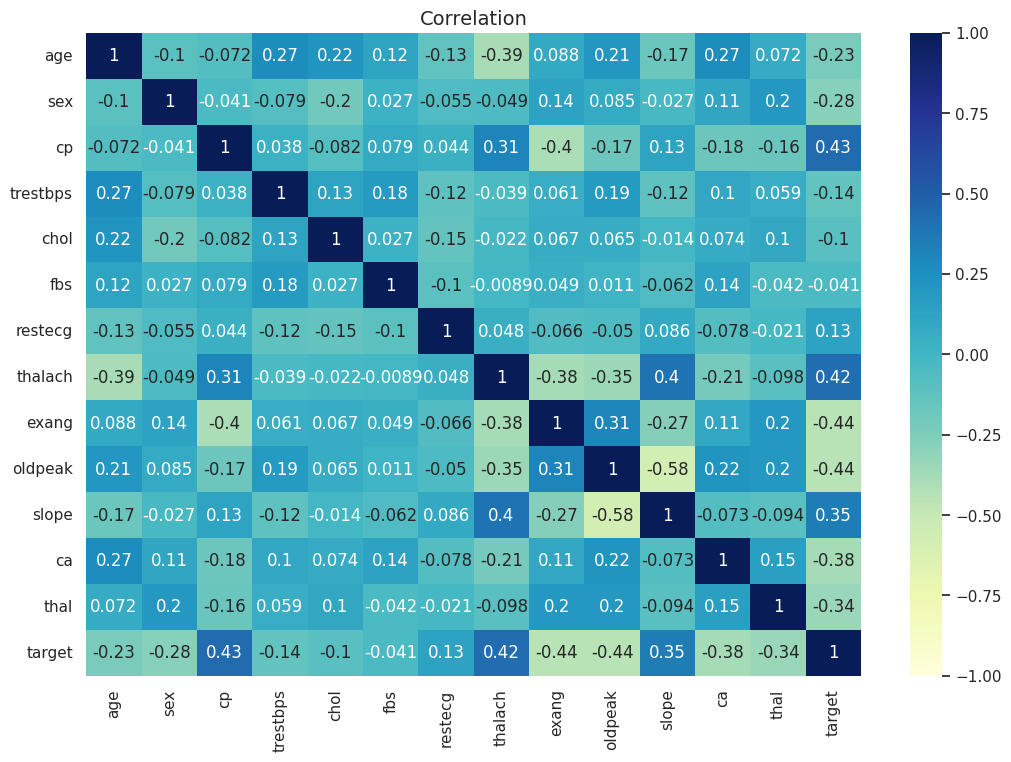

In [7]:
sns.set(rc={'figure.figsize':(12.5,8.35)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True,cmap='YlGnBu')
plt.title("Correlation", fontdict = {'fontsize': 14})
plt.show()

In [9]:
x_tr,x_te,y_tr,y_te=train_test_split(df.drop(['target'],axis=1),df['target'],random_state=500,test_size=.4)

In [10]:
y_tr=pd.DataFrame(y_tr)
y_te=pd.DataFrame(y_te)
y_tr.columns=['target']
y_te.columns=['target']
display(x_tr.head())
print(x_tr.shape)

display(y_tr.head())
print(y_tr.shape)

display(x_te.head())
print(x_te.shape)

display(y_te.head())
print(y_te.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
771,45,0,0,138,236,0,0,152,1,0.2,1,0,2
926,54,1,0,110,206,0,0,108,1,0.0,1,1,2
632,45,0,1,130,234,0,0,175,0,0.6,1,0,2
112,48,1,0,130,256,1,0,150,1,0.0,2,2,3
617,41,0,1,126,306,0,1,163,0,0.0,2,0,2


(615, 13)


,target
771,1
926,0
632,1
112,0
617,1


(615, 1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
562,42,0,2,120,209,0,1,173,0,0.0,1,0,2
174,54,1,0,110,239,0,1,126,1,2.8,1,1,3
849,52,1,0,128,255,0,1,161,1,0.0,2,1,3
80,50,1,2,140,233,0,1,163,0,0.6,1,1,3
394,63,1,0,130,330,1,0,132,1,1.8,2,3,3


(410, 13)


,target
562,1
174,0
849,0
80,0
394,0


(410, 1)


In [11]:
dt_gini = DecisionTreeClassifier(criterion='gini',random_state=1)
dt_gini.fit(x_tr, y_tr)

DecisionTreeClassifier(random_state=1)

In [12]:
y_pr_gini = dt_gini.predict(x_te)

In [13]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_te, y_pr_gini)))

Model accuracy score with criterion gini index: 0.9293


In [14]:
dt_ent = DecisionTreeClassifier(criterion='entropy',random_state=50)
dt_ent.fit(x_tr, y_tr)

DecisionTreeClassifier(criterion='entropy', random_state=50)

In [15]:
y_pr_ent = dt_ent.predict(x_te)

In [16]:
print('Model accuracy score with criterion ent: {0:0.4f}'. format(accuracy_score(y_te, y_pr_ent)))

Model accuracy score with criterion ent: 0.9683


In [17]:
x1=tree.export_graphviz(dt_gini.fit(x_tr, y_tr),filled=True)

In [18]:
import pydotplus
graph1 = pydotplus.graphviz.graph_from_dot_data(x1)

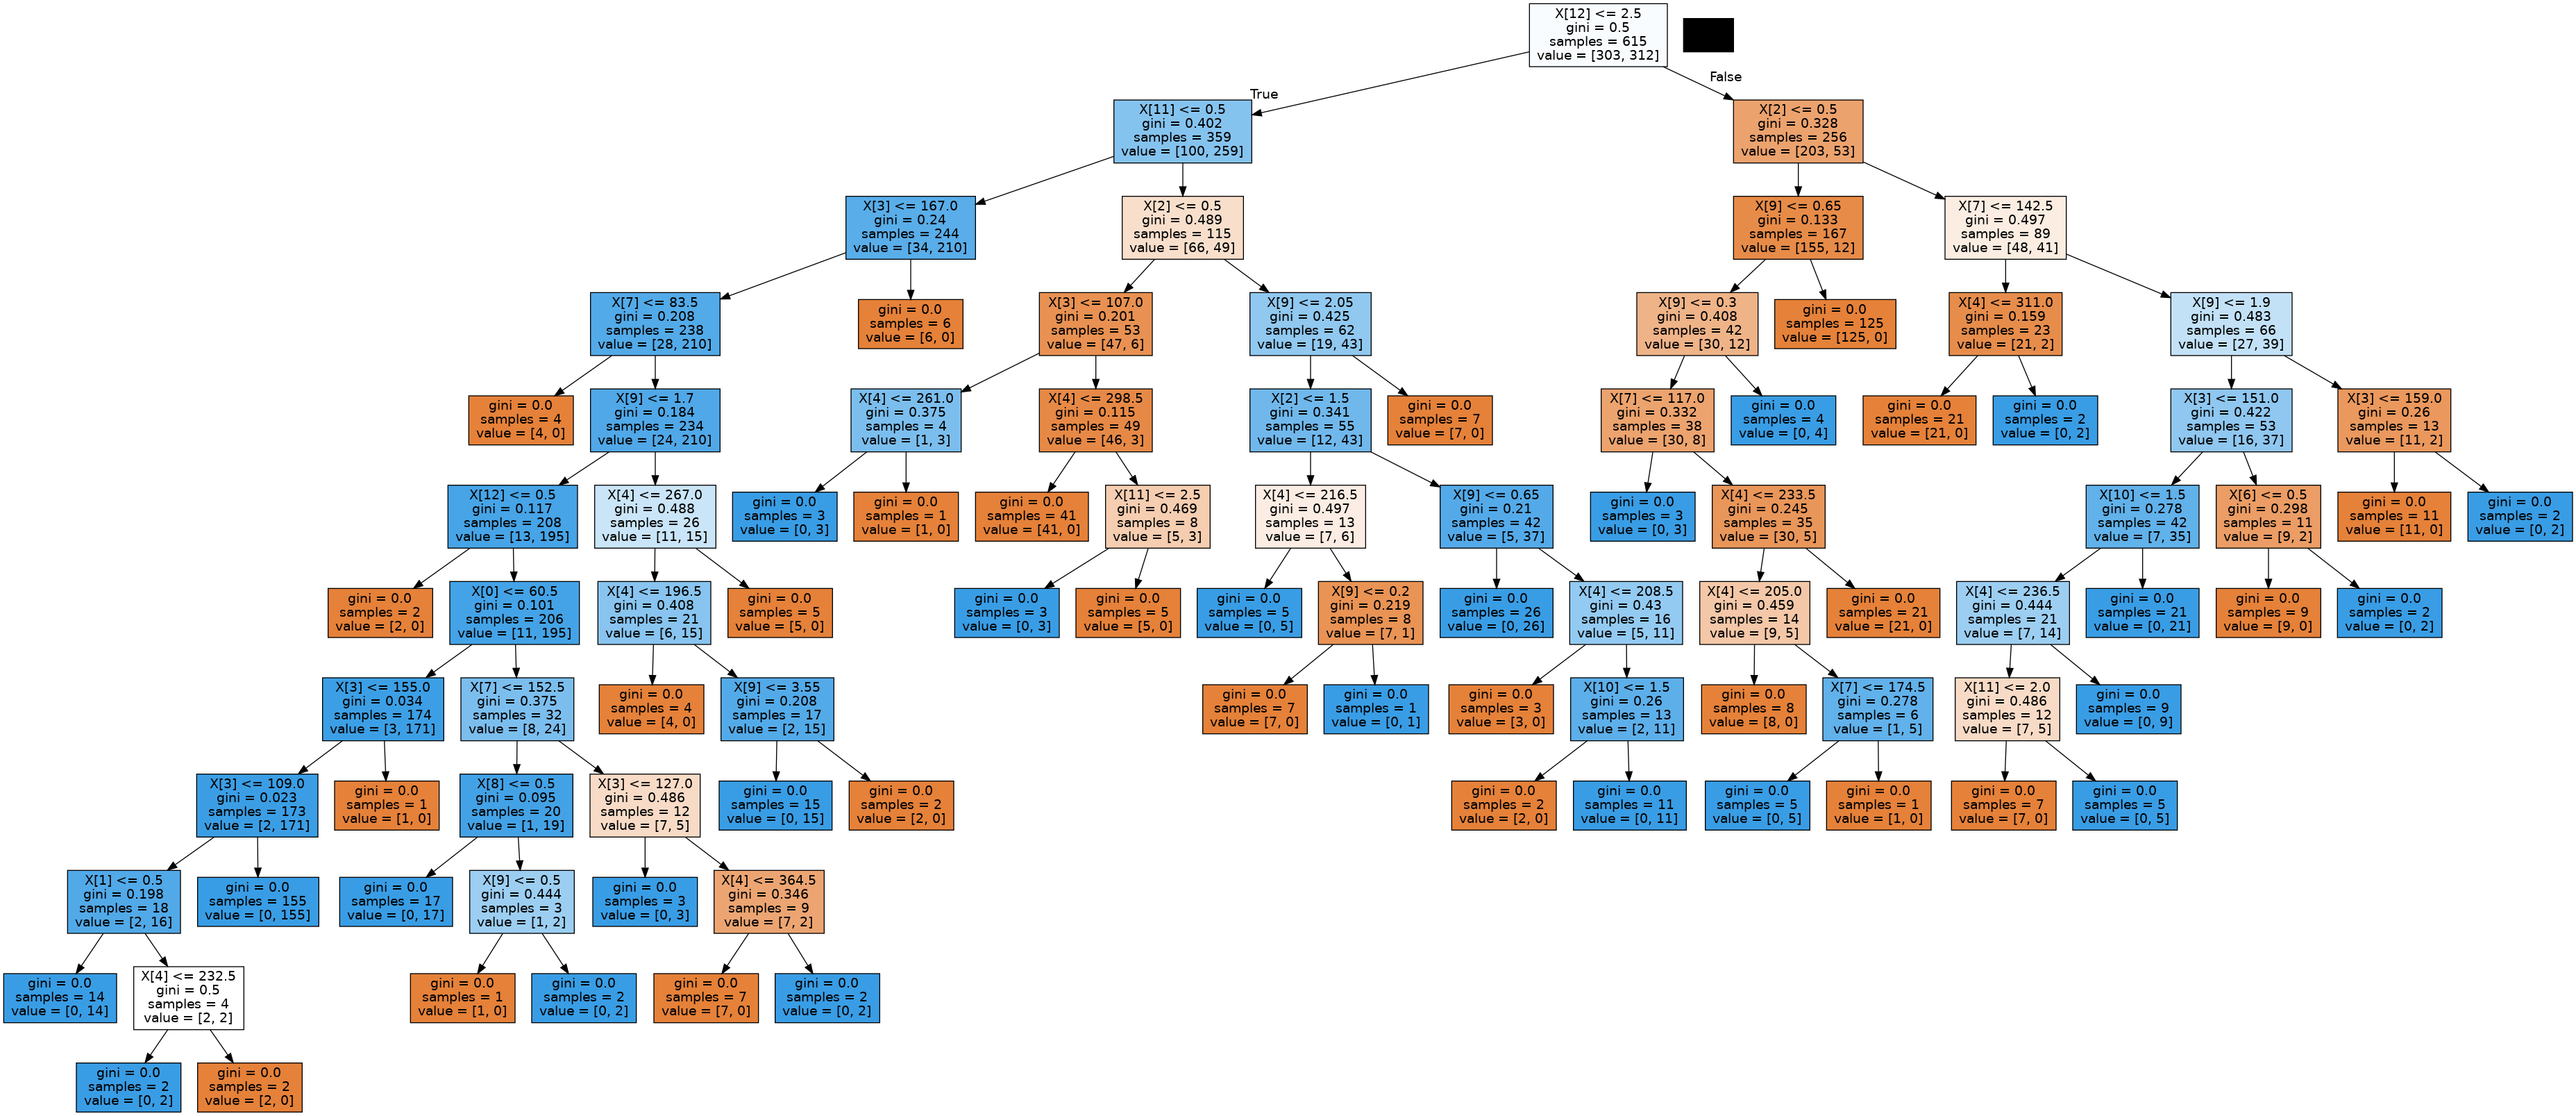

In [19]:
from IPython.display import Image
Image(graph1.create_png())

In [20]:
x2=tree.export_graphviz(dt_ent.fit(x_tr, y_tr),filled=True)

In [21]:
graph2 = pydotplus.graphviz.graph_from_dot_data(x2)

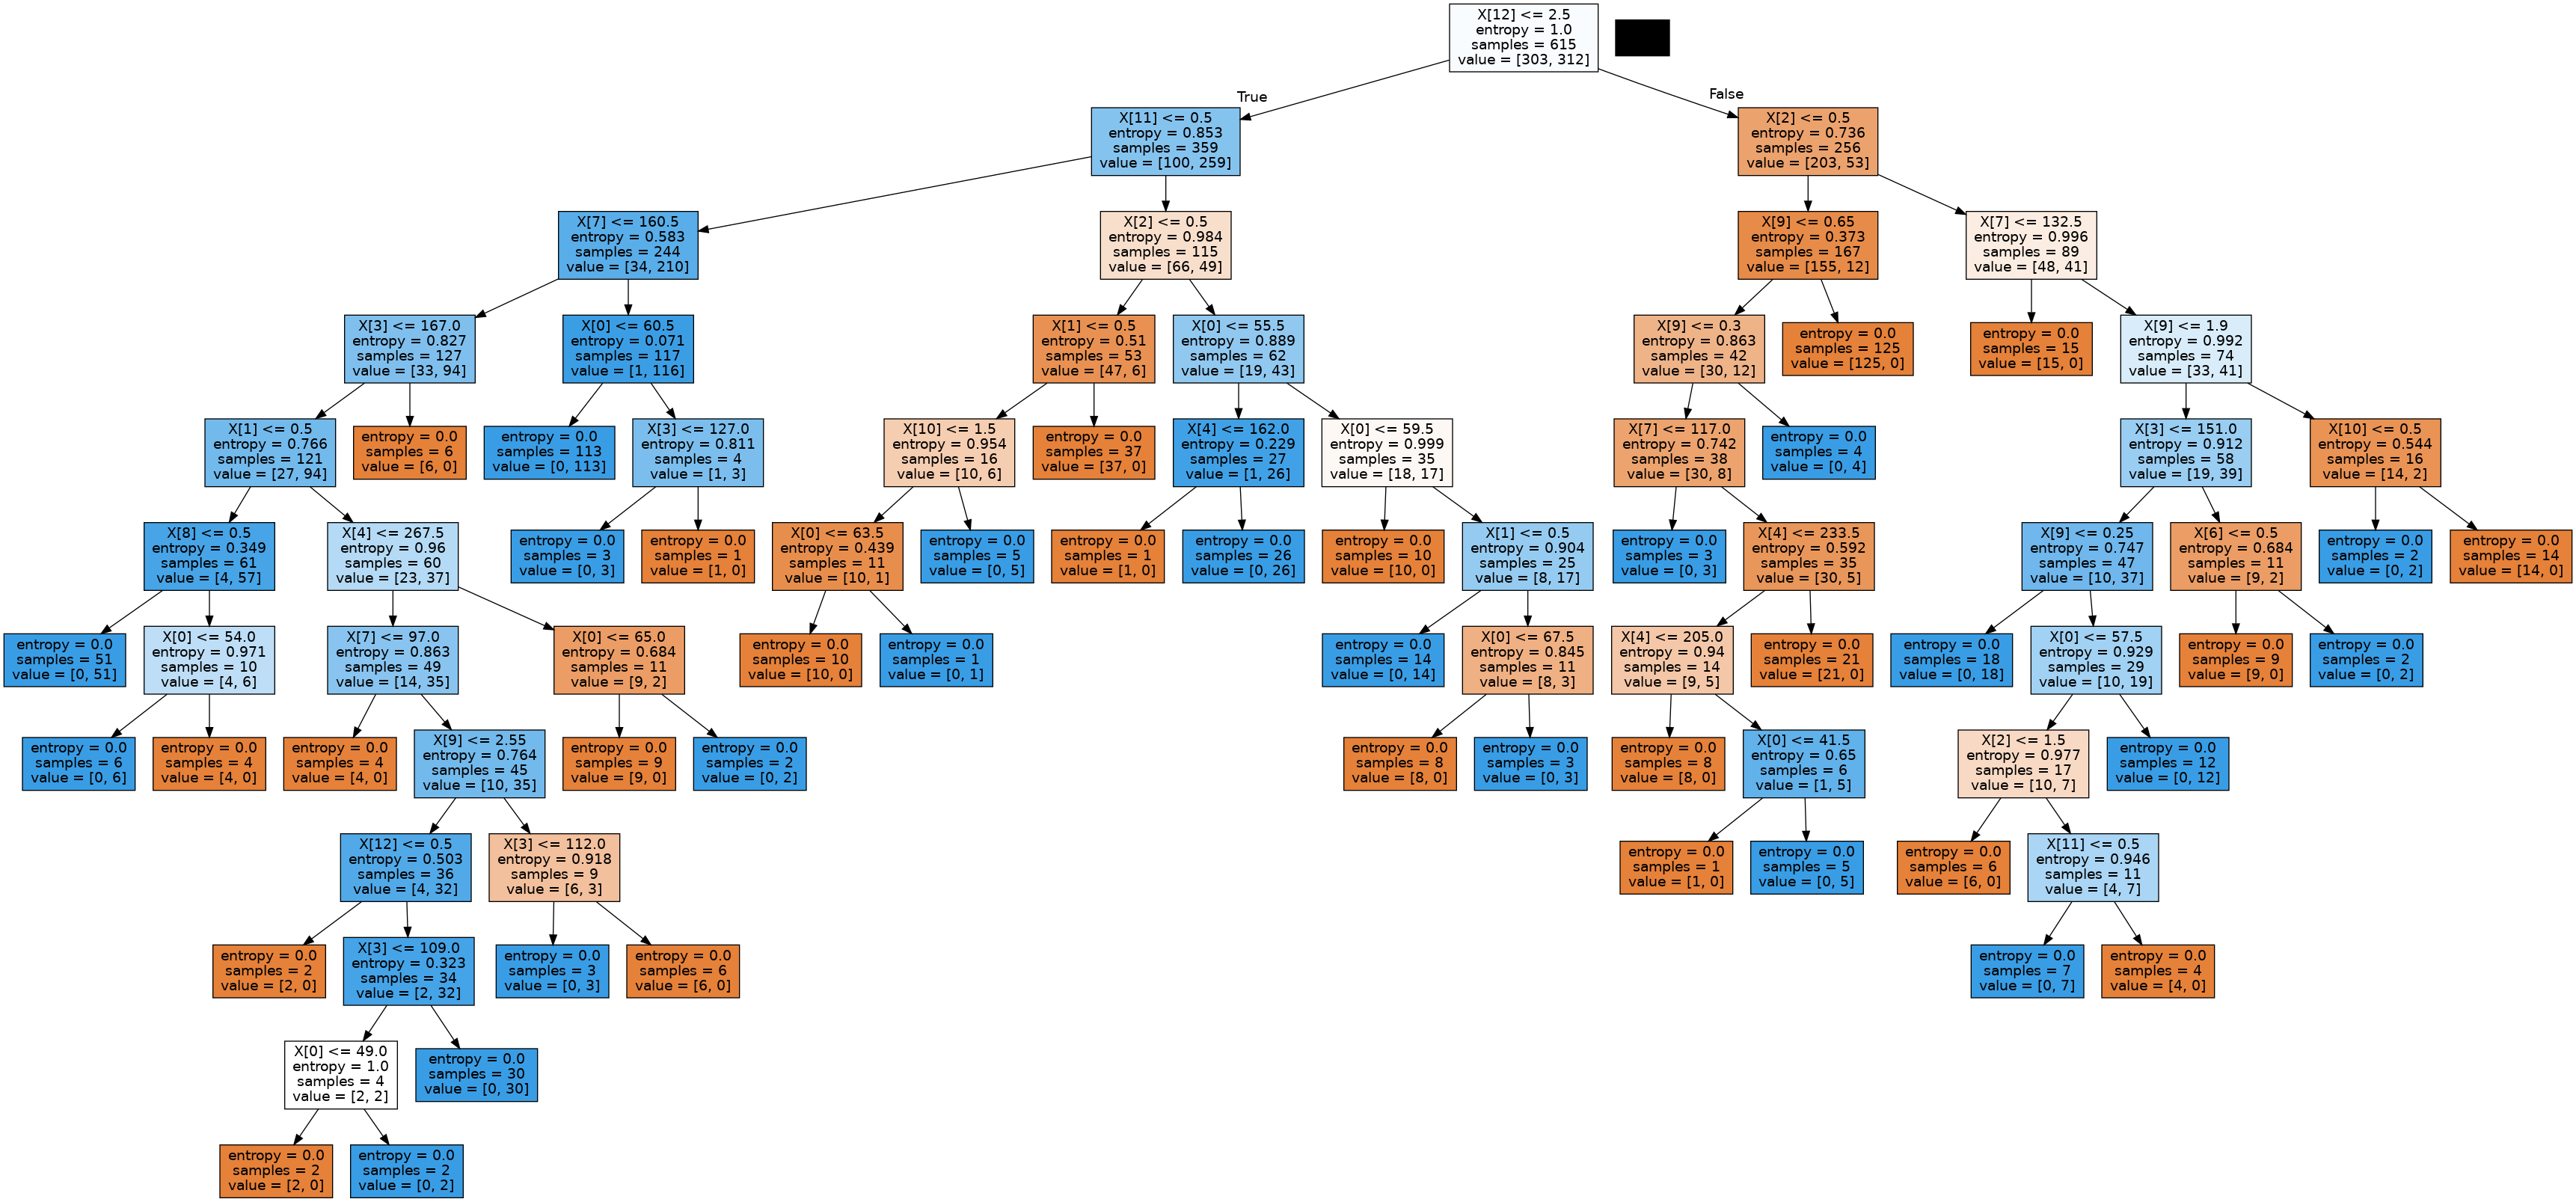

In [22]:
Image(graph2.create_png())

In [23]:
tr_acc=[]
te_acc=[]
m_s=[]
for i in range(2,101,2):
    m_s.append(i)
    temp=DecisionTreeClassifier(criterion='gini',random_state=1,min_samples_split=i)
    temp=temp.fit(x_tr,y_tr)
    temp_pred=temp.predict(x_tr)
    tr_acc.append(accuracy_score(y_tr, temp_pred))
    temp_pred=temp.predict(x_te)
    te_acc.append(accuracy_score(y_te, temp_pred))
    
    

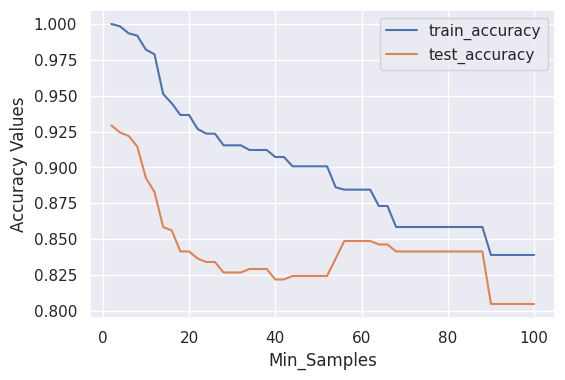

In [25]:
plt.figure(figsize=(6,4))
plt.plot(m_s,tr_acc, label = 'train_accuracy')
plt.plot(m_s,te_acc, label = 'test_accuracy')
plt.xlabel('Min_Samples')
plt.ylabel('Accuracy Values')
plt.legend()
plt.show()